In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [39]:
import numpy as np
X_train = np.loadtxt(r'C:\Users\dhana\OneDrive\Desktop\Image classification\Image Classification CNN Keras Dataset\input.csv',delimiter=',')
Y_train = np.loadtxt(r'C:\Users\dhana\OneDrive\Desktop\Image classification\Image Classification CNN Keras Dataset\labels.csv',delimiter=',')

X_test = np.loadtxt(r'C:\Users\dhana\OneDrive\Desktop\Image classification\Image Classification CNN Keras Dataset\input_test.csv',delimiter=',')
Y_test = np.loadtxt(r'C:\Users\dhana\OneDrive\Desktop\Image classification\Image Classification CNN Keras Dataset\labels_test.csv',delimiter=',')

In [40]:
print("shape of x_train: ",X_train.shape)
print("shape of y_train: ",Y_train.shape)
print("shape of x_test: ",X_test.shape)
print("shape of y_test: ",Y_test.shape)

shape of x_train:  (2000, 30000)
shape of y_train:  (2000,)
shape of x_test:  (400, 30000)
shape of y_test:  (400,)


In [41]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [42]:
print("shape of x_train: ",X_train.shape)
print("shape of y_train: ",Y_train.shape)
print("shape of x_test: ",X_test.shape)
print("shape of y_test: ",Y_test.shape)

shape of x_train:  (2000, 100, 100, 3)
shape of y_train:  (2000, 1)
shape of x_test:  (400, 100, 100, 3)
shape of y_test:  (400, 1)


In [43]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [44]:
X_train=X_train/255.0
Y_train=Y_train/255.0

In [45]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

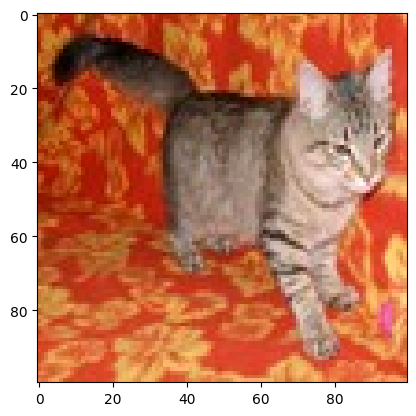

In [46]:
import matplotlib.pyplot as plt
import random
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [47]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPool2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\dhana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.4836 - loss: 0.1055
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.5122 - loss: 0.0155
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.4864 - loss: 0.0148
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4872 - loss: 0.0145
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.5072 - loss: 0.0139
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.4833 - loss: 0.0145
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.4944 - loss: 0.0142
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5033 - loss: 0.0140 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.4995 - loss: 0.0139
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5013 - loss: 0.0137


In [50]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7916 - loss: 163.2534


[390.7203063964844, 0.5]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.0..255.0].


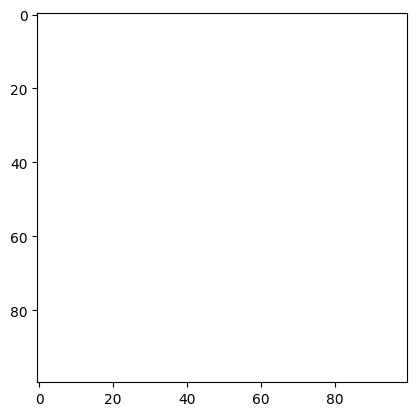

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.]]
our model says it is a :  Dog


In [51]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred >0.5
if(y_pred==0):
    pred = 'Dog'
else:
    pred = 'cat'

print("our model says it is a : ",pred)